In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re

import importlib
import EDA_functions as EDA_functions
importlib.reload(EDA_functions)
from EDA_functions import *

scaler_mm = MinMaxScaler()
scaler_ss = StandardScaler()

clean_path = '../../data/processed_data/'
raw_path = '../../data/raw_data/'

Value of U.S. agricultural exports to Canada in billions of dollars

*Annual from 2000-2023

In [2]:
us_exp_val_can = pd.read_csv(raw_path+'us_exports_can.csv', header=0, index_col=0, skiprows=2, on_bad_lines='skip', engine='python')
us_exp_val_can.index = us_exp_val_can.index.rename('Date')
us_exp_val_can = us_exp_val_can.rename(columns={'Unnamed: 1':'Export Value'})

us_exp_val_can.index = pd.to_datetime(us_exp_val_can.index, format='%Y')
us_exp_val_can = us_exp_val_can.apply(pd.to_numeric)

us_exp_val_can.head()

,Export Value
Date,
2000-01-01,7.64
2001-01-01,8.12
2002-01-01,8.66
2003-01-01,9.32
2004-01-01,9.73


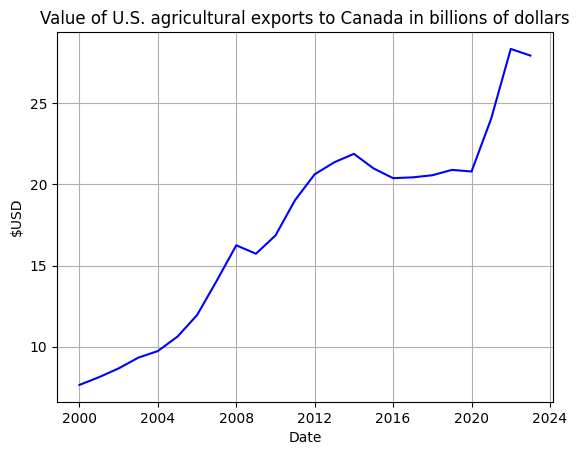

In [3]:
plot_targets([us_exp_val_can],
            1,
            'f',
            'blue',
            'Value of U.S. agricultural exports to Canada in billions of dollars',
            'Date',
            '$USD',
            'False',
            'True')

In [4]:
us_exp_val_can_s = ss_scale_a_df(us_exp_val_can, 'YS')


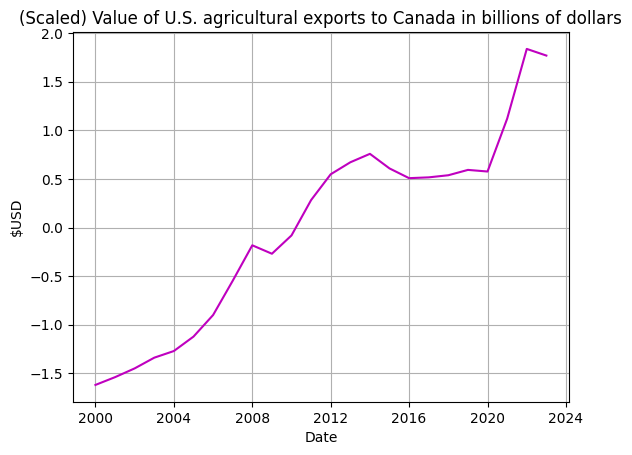

In [5]:
plot_targets([us_exp_val_can_s],
            1,
            'f',
            'm',
            '(Scaled) Value of U.S. agricultural exports to Canada in billions of dollars',
            'Date',
            '$USD',
            'False',
            'True')

Canadian Ag/Food Imports

Stats Canada

Quarterly from 2017-2024

In [6]:
can_ag_imp = pd.read_csv(raw_path+'can_ag_imp.csv', header=0, index_col=0, skiprows=12, skipfooter=10, on_bad_lines='skip', engine='python', thousands=',')
can_ag_imp.drop(can_ag_imp.index[0:2], inplace=True)

#converting quarter dates
can_ag_imp['Year'] = 'Year'
can_ag_imp['Quarter'] = 'Quarter'
can_ag_imp['Date'] = 'Date'

can_ag_imp['Year'] = can_ag_imp.index.str[2:7]
can_ag_imp['Quarter'] = can_ag_imp.index.str[:2]

def convert_to_datetime(row):
    month = int(row['Quarter'][1]) * 3 - 2
    return pd.Timestamp(year=int(row['Year']), month=month, day=1)

can_ag_imp['Date'] = can_ag_imp.apply(convert_to_datetime, axis=1)

can_ag_imp.set_index(can_ag_imp['Date'], inplace=True)
can_ag_imp.drop(columns=can_ag_imp.columns[4:], inplace=True)

can_ag_imp = can_ag_imp.apply(pd.to_numeric)

can_ag_imp_s = ss_scale_a_df(can_ag_imp, 'MS')

can_ag_imp.head()


,"Farm, fishing and intermediate food products",Farm and fishing products,Intermediate food products,"Food, beverage and tobacco products"
Date,,,,
2017-01-01,18832,15288.0,3543.0,28887.0
2017-04-01,18993,15372.0,3623.0,29334.0
2017-07-01,20414,16749.0,3659.0,29355.0
2017-10-01,21097,17514.0,3587.0,29632.0
2018-01-01,21087,17412.0,3672.0,28969.0


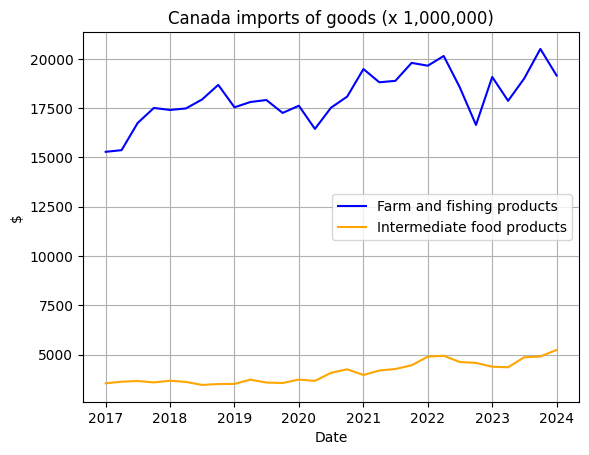

In [7]:
plot_targets([can_ag_imp['Farm and fishing products'], can_ag_imp['Intermediate food products']],
            2,
            ['Farm and fishing products', 'Intermediate food products'],
            ['b', 'orange'],
            'Canada imports of goods (x 1,000,000)',
            'Date',
            '$',
            'True',
            'True')


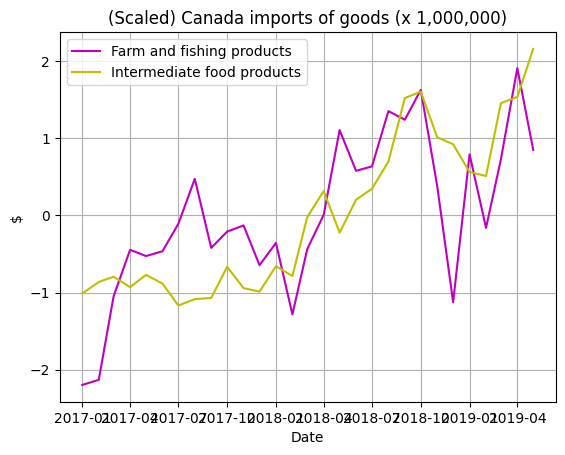

In [8]:
plot_targets([can_ag_imp_s.iloc[:,1], can_ag_imp_s.iloc[:,2]],
            2,
            ['Farm and fishing products', 'Intermediate food products'],
            ['m', 'y'],
            '(Scaled) Canada imports of goods (x 1,000,000)',
            'Date',
            '$',
            'True',
            'True')

Canadian Ag/Food Exports

Stats Canada

Quarterly from 2017-2024

In [9]:
can_ag_exp = pd.read_csv(raw_path+'can_ag_exp.csv', header=0, index_col=0, skiprows=12, skipfooter=10, on_bad_lines='skip', engine='python', thousands=',')
can_ag_exp.drop(can_ag_exp.index[0:2], inplace=True)

#converting quarter dates
can_ag_exp['Year'] = 'Year'
can_ag_exp['Quarter'] = 'Quarter'
can_ag_exp['Date'] = 'Date'

can_ag_exp['Year'] = can_ag_exp.index.str[2:7]
can_ag_exp['Quarter'] = can_ag_exp.index.str[:2]

def convert_to_datetime(row):
    month = int(row['Quarter'][1]) * 3 - 2
    return pd.Timestamp(year=int(row['Year']), month=month, day=1)

can_ag_exp['Date'] = can_ag_exp.apply(convert_to_datetime, axis=1)

can_ag_exp.set_index(can_ag_exp['Date'], inplace=True)
can_ag_exp.drop(columns=can_ag_exp.columns[4:], inplace=True)

can_ag_exp = can_ag_exp.apply(pd.to_numeric)

can_ag_exp_s = ss_scale_a_df(can_ag_exp, 'MS')

can_ag_exp.tail()

,"Farm, fishing and intermediate food products",Farm and fishing products,Intermediate food products,"Food, beverage and tobacco products"
Date,,,,
2023-01-01,46248,38423.0,8108.0,29296.0
2023-04-01,39487,32292.0,7316.0,28751.0
2023-07-01,40548,32119.0,8320.0,28745.0
2023-10-01,41342,33104.0,8200.0,29906.0
2024-01-01,42122,33650.0,8420.0,30840.0


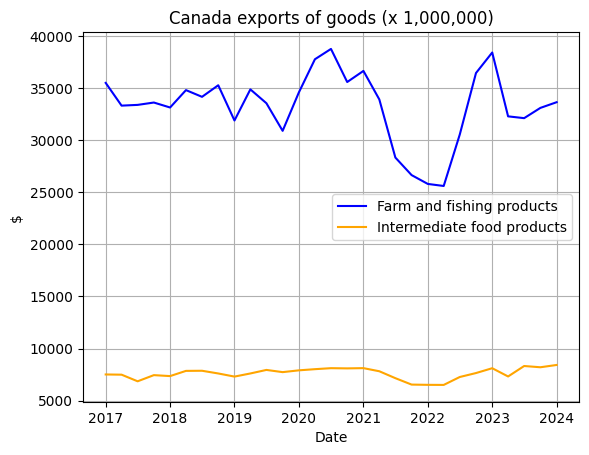

In [10]:
plot_targets([can_ag_exp['Farm and fishing products'], can_ag_exp['Intermediate food products']],
            2,
            ['Farm and fishing products', 'Intermediate food products'],
            ['b', 'orange'],
            'Canada exports of goods (x 1,000,000)',
            'Date',
            '$',
            'True',
            'True')

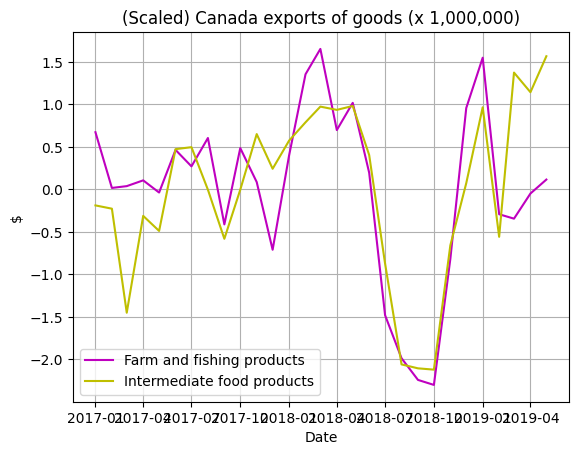

In [11]:
plot_targets([can_ag_exp_s.iloc[:,1], can_ag_exp_s.iloc[:,2]],
            2,
            ['Farm and fishing products', 'Intermediate food products'],
            ['m', 'y'],
            '(Scaled) Canada exports of goods (x 1,000,000)',
            'Date',
            '$',
            'True',
            'True')

Stats Canada: Farm product price index (FPPI), monthly

Table: 32-10-0098-01 (formerly CANSIM 002-0068)

Index 2007=100

"The Farm product price index (FPPI) measures the change through time in prices received by farmers from the sale of agricultural products"

In [12]:
fppi = pd.read_csv(raw_path+'FPPI.csv', header=0, index_col=0, skiprows=9, skipfooter=20, on_bad_lines='skip', engine='python')
fppi.index = fppi.index.rename('Date')
fppi.drop(fppi.index[0:2], inplace=True)
fppi.drop(columns=fppi.columns[4], inplace=True) #getting rid of the specialty column bc missing a lot of data

fppi.columns = [remove_num(col) for col in fppi.columns]

col_names_fppi = list(fppi.columns)

fppi.index = pd.to_datetime(fppi.index, format='%B %Y')

fppi = fppi.apply(pd.to_numeric)

fppi_s = ss_scale_a_df(fppi, 'MS')

fppi

,Total index,Total crops,Grains,Oilseeds,Fresh fruit,Fresh vegetables (except potatoes and pulse crops),Fresh potatoes,Total livestock and animal products,Cattle and calves,Hogs,"Chickens, turkeys, chicks, poults",Eggs in shell,Unprocessed milk
Date,,,,,,,,,,,,,
1986-01-01,77.5,71.4,65.0,77.8,51.7,72.0,39.9,83.7,93.4,119.1,87.6,82.6,58.3
1986-02-01,77.4,71.0,65.0,74.5,51.7,72.0,39.9,83.8,92.6,120.8,87.8,83.4,58.5
1986-03-01,76.4,70.0,64.0,73.4,51.7,72.0,37.8,82.8,93.3,113.6,87.6,84.1,57.7
1986-04-01,75.3,69.5,63.5,70.1,51.7,72.0,39.6,81.1,90.7,109.3,87.9,84.0,57.0
1986-05-01,75.9,69.1,62.8,69.4,51.7,72.0,43.6,82.5,92.1,119.5,89.1,83.2,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,194.9,188.1,173.3,211.4,135.1,188.3,206.3,197.2,277.4,200.9,165.8,196.3,127.8
2023-09-01,191.1,184.0,169.2,203.2,146.1,188.8,197.3,198.5,285.3,180.4,165.3,196.3,129.7
2023-10-01,191.1,186.3,167.4,210.0,151.4,188.9,199.9,198.9,282.8,171.1,164.9,196.2,133.4


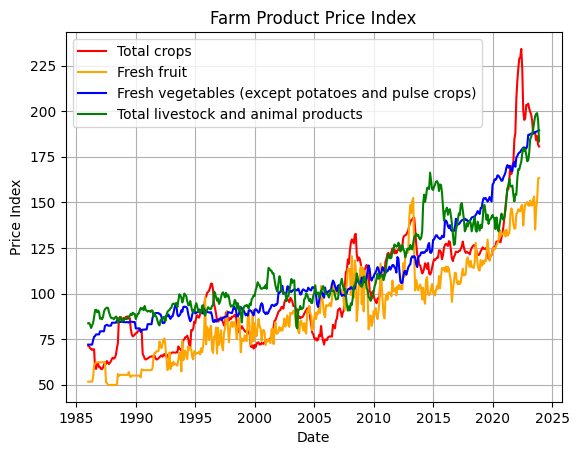

In [13]:


plot_targets([fppi[col_names_fppi[1]], fppi[col_names_fppi[4]], fppi[col_names_fppi[5]], fppi[col_names_fppi[7]]],
            4,
            [col_names_fppi[1], col_names_fppi[4], col_names_fppi[5], col_names_fppi[7]],
            ['r', 'orange', 'blue', 'green'],
            'Farm Product Price Index',
            'Date',
            'Price Index',
            'True',
            'True')

Stats Canada: Raw materials price index for crop products, animals and animal products, monthly

Table: 18-10-0268-03

Index, 202001=100

"The Raw Materials Price Index (RMPI) measures price changes for raw materials purchased by industries in Canada for further processing."

*Pretty similar to the FPPI but has some morer fine details that could be helpful

In [14]:
rmpi = pd.read_csv(raw_path+'RMPI.csv', header=0, index_col=0, skiprows=9, skipfooter=16, on_bad_lines='skip', engine='python')
rmpi.index = rmpi.index.rename('Date')
rmpi.drop(rmpi.index[0:2], inplace=True)

drop_list = [5,6,9,10,11,15,17,18,19,21,25,26,29] #columns with less data than the others
rmpi.drop(columns=rmpi.columns[drop_list], inplace=True) 

rmpi.columns = [remove_reg(col) for col in rmpi.columns]

col_names_rmpi = list(rmpi.columns)

rmpi.index = pd.to_datetime(rmpi.index, format='%B %Y')
rmpi = rmpi.apply(pd.to_numeric)

rmpi_s = ss_scale_a_df(rmpi, 'MS')

rmpi.head()

,"Total, Raw materials price indexes (RMPI)","Total, excluding crude energy products",Crop products,Wheat,Canola (including rapeseed),Fresh potatoes,Fresh vegetables (except potatoes and pulse crops),Corn for grain,Oats,Barley,Soybeans,Animals and animal products,Cattle and calves,Hogs,Poultry,Eggs in shell,Unprocessed milk,"Fish, crustaceans, shellfish and other fishery products"
Date,,,,,,,,,,,,,,,,,,
1986-01-01,48.4,47.5,54.4,63.9,60.1,17.8,66.0,70.3,41.9,68.4,67.3,58.4,57.9,91.8,65.2,49.8,45.5,52.9
1986-02-01,45.1,47.5,52.7,63.5,56.4,16.4,60.2,69.2,40.9,66.2,67.4,59.0,55.1,95.0,65.2,50.3,45.5,53.9
1986-03-01,41.5,47.6,53.2,63.9,54.5,16.3,61.3,65.9,39.4,65.2,66.8,58.5,56.1,90.1,64.9,50.9,45.5,53.3
1986-04-01,38.6,47.3,53.1,64.9,53.2,17.9,62.6,64.9,36.2,62.2,66.5,57.5,55.4,85.8,66.0,50.6,45.5,51.3
1986-05-01,38.6,47.6,52.9,65.6,52.8,17.7,61.0,64.9,37.0,70.5,66.7,58.3,55.4,96.3,67.1,50.0,45.5,50.1


In [15]:
rmpi.columns

Index(['Total, Raw materials price indexes (RMPI)',
       'Total, excluding crude energy products', 'Crop products  ', 'Wheat  ',
       'Canola (including rapeseed)  ', 'Fresh potatoes  ',
       'Fresh vegetables (except potatoes and pulse crops)  ',
       'Corn for grain  ', 'Oats  ', 'Barley  ', 'Soybeans  ',
       'Animals and animal products  ', 'Cattle and calves  ', 'Hogs  ',
       'Poultry  ', 'Eggs in shell  ', 'Unprocessed milk  ',
       'Fish, crustaceans, shellfish and other fishery products  '],
      dtype='object')

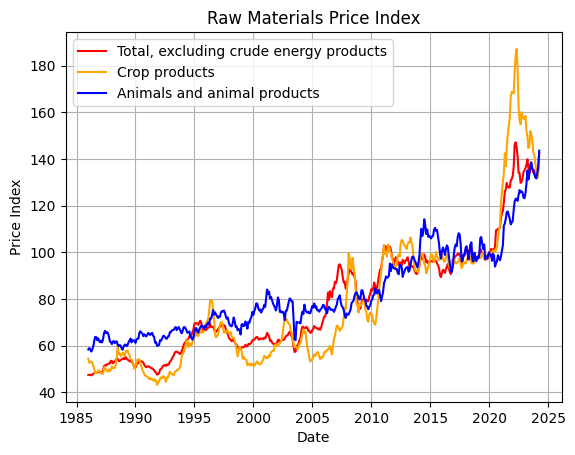

In [16]:
plot_targets([rmpi[col_names_rmpi[1]], rmpi[col_names_rmpi[2]], rmpi[col_names_rmpi[11]]],
            3,
            [col_names_rmpi[1], col_names_rmpi[2], col_names_rmpi[11]],
            ['r', 'orange', 'blue'],
            'Raw Materials Price Index',
            'Date',
            'Price Index',
            'True',
            'True')

Wheat produced and milled (**just the average catetgories - there are more detailed breakdowns of types of wheat in the data, but I am just reading in the avg columns)
Stat Can

1995-2024

In [17]:
wheat = pd.read_csv(raw_path+'wheat_milled.csv', header=0, index_col=0, skiprows=9, skipfooter=16, on_bad_lines='skip', engine='python')
wheat.index = wheat.index.rename('Date')
wheat.drop(wheat.index[0:2], inplace=True)

wheat.index = pd.to_datetime(wheat.index, format='%B %Y')
wheat = wheat.apply(pd.to_numeric)

wheat.columns = [remove_num(col) for col in wheat.columns]

wheat_cols = list(wheat.columns)

wheat_s = ss_scale_a_df(wheat, 'MS')

wheat.tail()

,Total wheat milled,Total wheat flour produced,Millfeeds produced
Date,,,
2023-08-01,293,220.0,67.0
2023-09-01,293,218.0,65.0
2023-10-01,289,216.0,64.0
2023-11-01,301,225.0,67.0
2023-12-01,254,191.0,58.0


In [18]:
wheat.columns

Index(['Total wheat milled ', 'Total wheat flour produced ',
       'Millfeeds produced '],
      dtype='object')

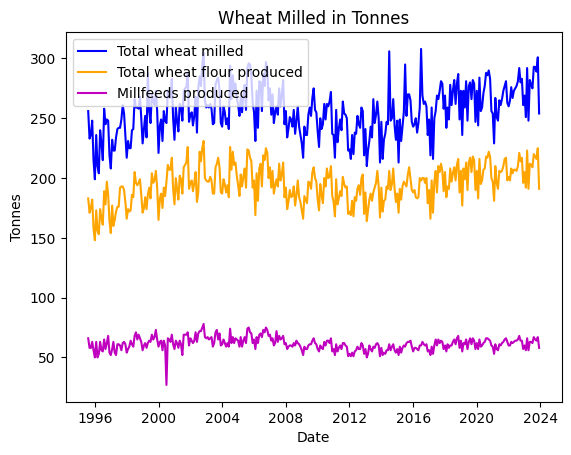

In [19]:
plot_targets(dfs=[wheat[wheat_cols[0]], wheat[wheat_cols[1]], wheat[wheat_cols[2]]],
             num_targets=3,
             colors=['b', 'orange', 'm'],
             legend_labels=['Total wheat milled', 'Total wheat flour produced', 'Millfeeds produced'],
             title='Wheat Milled in Tonnes',
             xlabel='Date',
             ylabel='Tonnes',
             legend_tf='True')

Seed oil production in Canada
StatCan

In [20]:
seed_oil = pd.read_csv(raw_path+'seed_oil.csv', header=0, index_col=0, skiprows=9, skipfooter=10, on_bad_lines='skip', engine='python', thousands=',')
seed_oil.index = seed_oil.index.rename('Date')
seed_oil.drop(seed_oil.index[0:3], inplace=True)

seed_oil.index = pd.to_datetime(seed_oil.index, format='%B %Y')
seed_oil = seed_oil.apply(pd.to_numeric)

seed_oil_cols = list(seed_oil.columns)

seed_oil_s = ss_scale_a_df(seed_oil, 'MS')

seed_oil.head()

,Seed crushed,Oil produced,Meal produced
Date,,,
1986-01-01,101649,41775,58197
1986-02-01,100538,42026,56395
1986-03-01,124829,51905,71101
1986-04-01,86491,36129,49256
1986-05-01,83939,33969,48452


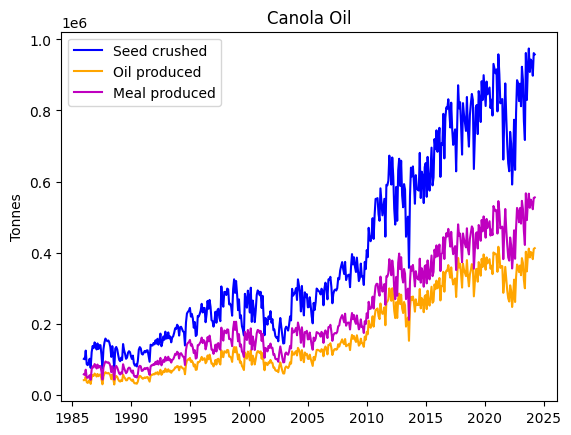

In [21]:
plot_targets(dfs=[seed_oil.iloc[:,0], seed_oil.iloc[:,1], seed_oil.iloc[:,2]],
             num_targets=3,
             title='Canola Oil',
             ylabel='Tonnes',
             colors=['b','orange','m'],
             legend_labels=['Seed crushed', 'Oil produced', 'Meal produced'],
             legend_tf='True')

Milk production and utilization
StatCan

In [22]:
milk_p_u = pd.read_csv(raw_path+'milk_p_u.csv', header=0, index_col=0, skiprows=9, skipfooter=15, on_bad_lines='skip', engine='python', thousands=',')
milk_p_u.index = milk_p_u.index.rename('Date')
milk_p_u.drop(milk_p_u.index[0:2], inplace=True)

milk_p_u.index = pd.to_datetime(milk_p_u.index, format='%B %Y')
milk_p_u = milk_p_u.apply(pd.to_numeric)

milk_p_u_cols = list(milk_p_u.columns)

milk_p_u.tail()

,"Milk sold off farms, total",Fluid purposes,Industrial purposes
Date,,,
2023-11-01,763330,228702.0,534628.0
2023-12-01,789750,229928.0,559822.0
2024-01-01,803098,229835.0,573263.0
2024-02-01,760581,212542.0,548039.0
2024-03-01,819861,221861.0,598001.0


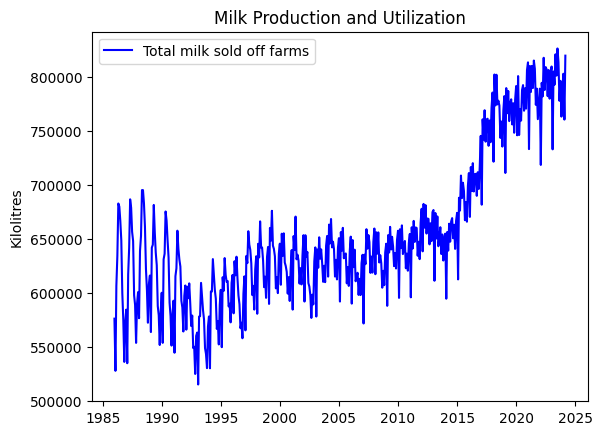

In [23]:
plot_targets(dfs=[milk_p_u.iloc[:,0]],
             num_targets=1,
             title='Milk Production and Utilization',
             ylabel='Kilolitres',
             colors=['b'],
             legend_labels=['Total milk sold off farms'],
             legend_tf='True')

Farm Input Price Index
StatCan
Quarterly from 2002 Q4 to 2023 Q4

In [32]:
fipi = pd.read_csv(raw_path+'FIPI.csv', header=0, index_col=0, skiprows=9, skipfooter=15, on_bad_lines='skip', engine='python', thousands=',', na_values='x')
fipi.drop(fipi.index[0:2], inplace=True)

#converting quarter dates
fipi['Year'] = 'Year'
fipi['Quarter'] = 'Quarter'
fipi['Date'] = 'Date'

fipi['Year'] = fipi.index.str[2:7]
fipi['Quarter'] = fipi.index.str[:2]

def convert_to_datetime(row):
    month = int(row['Quarter'][1]) * 3 - 2
    return pd.Timestamp(year=int(row['Year']), month=month, day=1)

fipi['Date'] = fipi.apply(convert_to_datetime, axis=1)

fipi.set_index(fipi['Date'], inplace=True)
fipi.drop(columns=fipi.columns[-6:], inplace=True)

fipi.drop(columns=fipi.columns[-4], inplace=True)
fipi.drop(columns=fipi.columns[-8], inplace=True)
fipi.drop(columns=fipi.columns[-8], inplace=True)

fipi = fipi.apply(pd.to_numeric)

fipi.head()

,Farm input total,Buildings,Machinery and motor vehicles,Depreciation on machinery and motor vehicles,Depreciation on machinery,Depreciation on motor vehicles,Machinery fuel,Machine repairs,General business costs,Crop production,...,"Twine, wire and containers",Production insurance,Stabilization premiums,Animal production,Livestock purchases,Cattle,Hogs,Commercial feed,Prepared feed,Grain feed
Date,,,,,,,,,,,,,,,,,,,,,
2002-10-01,69.7,75.1,69.8,93.5,89.3,112.0,44.8,83.0,71.7,60.3,...,83.7,34.1,69.3,75.5,81.7,82.2,76.8,72.1,71.7,73.4
2003-01-01,72.2,78.7,72.8,93.5,89.3,111.8,51.8,83.0,73.1,64.8,...,84.6,46.8,74.3,76.1,82.4,81.6,84.5,72.0,71.4,74.0
2003-04-01,71.2,77.9,68.7,92.4,88.1,111.0,43.3,83.0,73.5,64.9,...,85.2,46.8,74.3,75.4,84.3,82.5,92.1,69.1,69.6,67.4
2003-07-01,69.2,78.4,68.6,91.1,87.1,108.8,44.0,82.9,73.3,63.1,...,85.2,46.8,74.3,70.4,76.4,71.9,90.0,64.4,66.3,58.3
2003-10-01,69.3,78.0,67.6,91.0,86.4,110.8,41.9,82.7,73.0,64.7,...,84.6,46.8,74.3,70.3,75.7,73.8,75.6,63.7,66.0,56.1


In [24]:
fipi_cols = list(fipi.columns)
fipi_cols

['Farm input total',
 'Buildings',
 'Machinery and motor vehicles',
 'Depreciation on machinery and motor vehicles',
 'Depreciation on machinery',
 'Depreciation on motor vehicles',
 'Machinery fuel',
 'Machine repairs',
 'General business costs',
 'Crop production',
 'Commercial seed and plant',
 'Fertilizer',
 'Nitrogen fertilizers',
 'Other fertilizers',
 'Pesticides',
 'Twine, wire and containers',
 'Production insurance',
 'Stabilization premiums',
 'Cash wages in crop production',
 'Crop-related custom work',
 'Animal production',
 'Livestock purchases',
 'Cattle',
 'Hogs',
 'Poultry',
 'Commercial feed',
 'Prepared feed',
 'Grain feed']

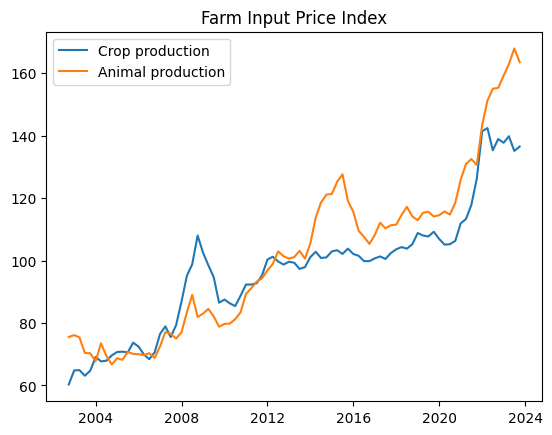

In [25]:
plot_targets(dfs=[fipi['Crop production'], fipi['Animal production']],
             num_targets=2,
             legend_labels=['Crop production', 'Animal production'],
             legend_tf='True',
             title='Farm Input Price Index')

Food Manufacturing Input Cost Price 
FRED

In [26]:
fmpi = pd.read_csv(raw_path+'food_manu_pi.csv', header=0, index_col=0)
fmpi =fmpi.rename(columns={'PCU311311':'FMPI'})
fmpi.index = pd.to_datetime(fmpi.index)
fmpi = fmpi.apply(pd.to_numeric)
fmpi

,FMPI
DATE,
1986-01-01,99.800
1986-02-01,99.200
1986-03-01,99.000
1986-04-01,98.600
1986-05-01,99.300
...,...
2023-12-01,253.713
2024-01-01,251.958
2024-02-01,253.463


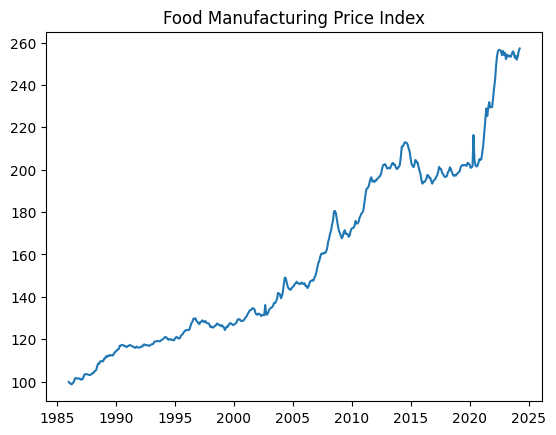

In [27]:
plot_targets(dfs=[fmpi],
             title='Food Manufacturing Price Index')

*Saving Clean CSVs*

In [33]:
"""us_exp_val_can.to_csv(clean_path+'us_exp_clean.csv')
can_ag_exp.to_csv(clean_path+'can_ag_exp_clean.csv')
can_ag_exp.to_csv(clean_path+'can_ag_exp_clean.csv')
fppi.to_csv(clean_path+'fppi_clean.csv')
rmpi.to_csv(clean_path+'rmpi_clean.csv')
wheat.to_csv(clean_path+'wheat_clean.csv')
seed_oil.to_csv(clean_path+'seed_oil_clean.csv')
milk_p_u.to_csv(clean_path+'milk_p_u_clean.csv')
fipi.to_csv(clean_path+'fipi_clean.csv')
fmpi.to_csv(clean_path+'fmpi.csv')"""

#fipi.to_csv(clean_path+'fipi_clean.csv')

